In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
with open("kddcup.names", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [3]:
cols="""duration,
protocol type,
service,
flag,
src bytes,
dst bytes,
Land,
wrong fragment,
urgent,
hot,
nums failed logins,
logged in,
num compromised,
root shell,
su attempted,
num_root,
num_file_creations,
num_shells,
num_access files,
num_outbound_conds,
is host login,
is guest_login,
count,
sev count,
serror rate,
srv_serror_rate,
terror_rate,
sry rerror_rate,
same srv_rate,
diff srv_rate,
SEV diff host_rate,
dst host count,
dst host srv_count,
dst host same srv_rate,
dst host diff sry rate,
dst host same src port rate,
dst host srv_serror_rate,
dst_host_srv_diff_host_rate,
dst host serror_rate,
dst host_rerror_rate,
dst_host_srv_rerror_rate"""
columns=[]
for c in cols.split(','):
    if(c.strip()):
        columns.append(c.strip())
columns.append('target')
print(columns)
print("---------->",len(columns))

['duration', 'protocol type', 'service', 'flag', 'src bytes', 'dst bytes', 'Land', 'wrong fragment', 'urgent', 'hot', 'nums failed logins', 'logged in', 'num compromised', 'root shell', 'su attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access files', 'num_outbound_conds', 'is host login', 'is guest_login', 'count', 'sev count', 'serror rate', 'srv_serror_rate', 'terror_rate', 'sry rerror_rate', 'same srv_rate', 'diff srv_rate', 'SEV diff host_rate', 'dst host count', 'dst host srv_count', 'dst host same srv_rate', 'dst host diff sry rate', 'dst host same src port rate', 'dst host srv_serror_rate', 'dst_host_srv_diff_host_rate', 'dst host serror_rate', 'dst host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']
----------> 42


In [4]:
with open("training_attack_types", 'r') as f:
    print (f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [5]:
attacks_types = {
'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
"pod": 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}
print(len(attacks_types))
print(attacks_types)

23
{'normal': 'normal', 'back': 'dos', 'buffer_overflow': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'ipsweep': 'probe', 'land': 'dos', 'loadmodule': 'u2r', 'multihop': 'r2l', 'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 'phf': 'r2l', 'pod': 'dos', 'portsweep': 'probe', 'rootkit': 'u2r', 'satan': 'probe', 'smurf': 'dos', 'spy': 'r2l', 'teardrop': 'dos', 'warezclient': 'r2l', 'warezmaster': 'r2l'}


In [6]:
path="kddcup.data_10_percent"
df=pd.read_csv(path, names=columns)
#Adding Attack Type column
df['Attack Type']=df.target.apply(lambda r:attacks_types[r[:-1]])
df.head(50)

,duration,protocol type,service,flag,src bytes,dst bytes,Land,wrong fragment,urgent,hot,...,dst host same srv_rate,dst host diff sry rate,dst host same src port rate,dst host srv_serror_rate,dst_host_srv_diff_host_rate,dst host serror_rate,dst host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,normal
5,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,normal
6,0,tcp,http,SF,212,1940,0,0,0,0,...,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.,normal
7,0,tcp,http,SF,159,4087,0,0,0,0,...,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.,normal
8,0,tcp,http,SF,210,151,0,0,0,0,...,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.,normal
9,0,tcp,http,SF,212,786,0,0,0,1,...,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.,normal


In [7]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

C:\Users\kesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack Type', ylabel='count'>

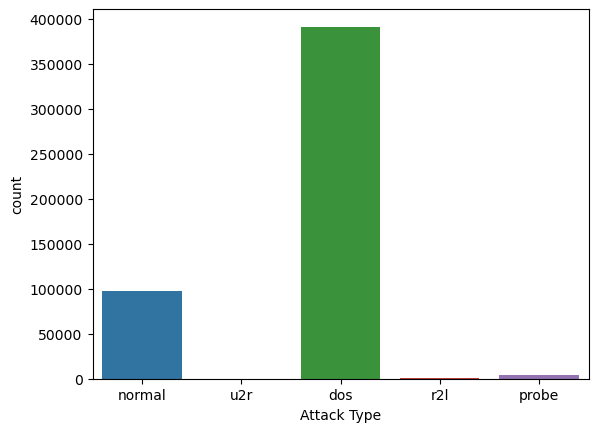

In [8]:
sns.countplot(df['Attack Type'])

In [9]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

<AxesSubplot:>

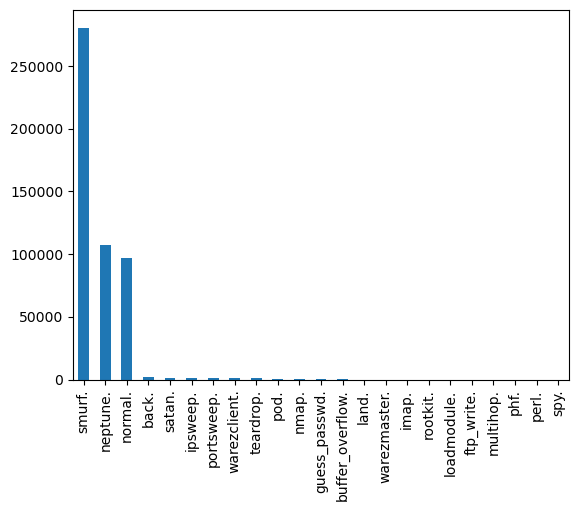

In [10]:
df['target'].value_counts().plot(kind='bar')

In [11]:
df.shape

(494021, 43)

In [12]:
df.isnull().sum()

duration                       0
protocol type                  0
service                        0
flag                           0
src bytes                      0
dst bytes                      0
Land                           0
wrong fragment                 0
urgent                         0
hot                            0
nums failed logins             0
logged in                      0
num compromised                0
root shell                     0
su attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access files               0
num_outbound_conds             0
is host login                  0
is guest_login                 0
count                          0
sev count                      0
serror rate                    0
srv_serror_rate                0
terror_rate                    0
sry rerror_rate                0
same srv_rate                  0
diff srv_rate                  0
SEV diff h

In [13]:
df.dtypes

duration                         int64
protocol type                   object
service                         object
flag                            object
src bytes                        int64
dst bytes                        int64
Land                             int64
wrong fragment                   int64
urgent                           int64
hot                              int64
nums failed logins               int64
logged in                        int64
num compromised                  int64
root shell                       int64
su attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access files                 int64
num_outbound_conds               int64
is host login                    int64
is guest_login                   int64
count                            int64
sev count                        int64
serror rate                    float64
srv_serror_rate          

In [14]:
print(df.shape)

(494021, 43)


In [17]:
#Finding categorical features
num_cols=df._get_numeric_data().columns
cate_cols=list (set (df.columns)-set (num_cols))
print(cate_cols)

cate_cols.remove('target')
cate_cols.remove('Attack Type')
print(cate_cols)
num_cols
print(df.shape)

['protocol type', 'service', 'target', 'Attack Type', 'flag']
['protocol type', 'service', 'flag']
(494021, 43)


C:\Users\kesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='protocol type', ylabel='count'>

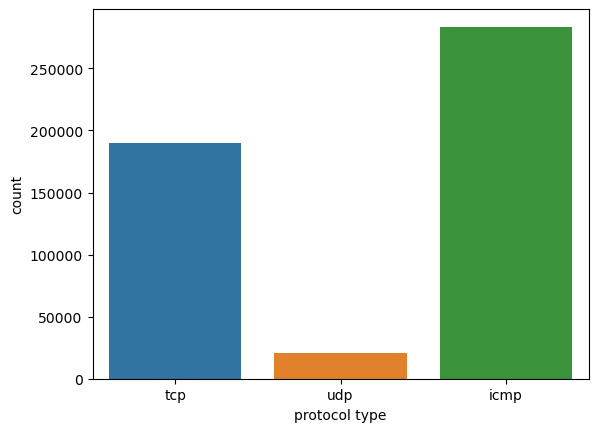

In [18]:
sns.countplot(df["protocol type"])

<AxesSubplot:ylabel='Density'>

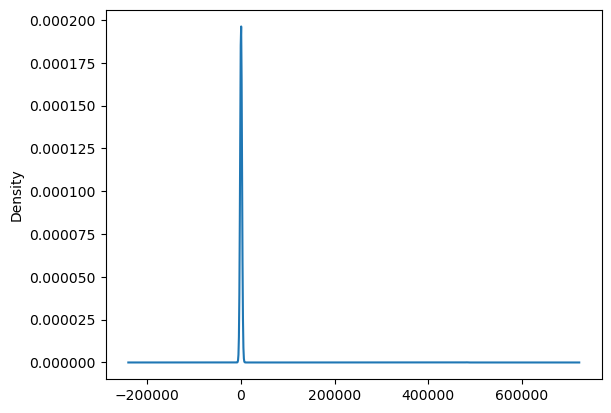

In [19]:
df['duration'].value_counts().plot(kind='kde')
#df['duration'].value_counts().plot(kind='pie')

ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64


<AxesSubplot:>

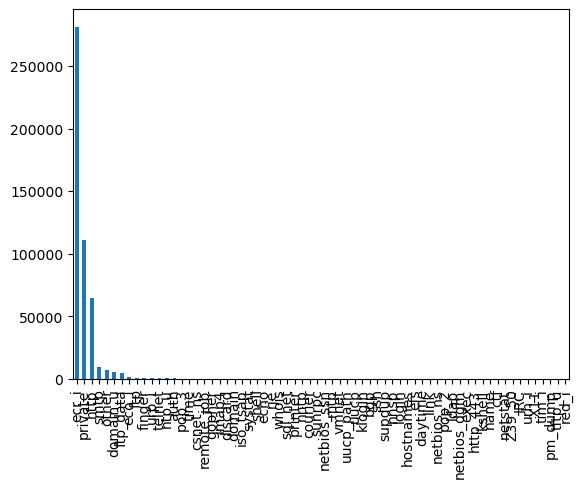

In [20]:
print(df['service'].value_counts())
df['service'].value_counts().plot(kind='bar')

<AxesSubplot:>

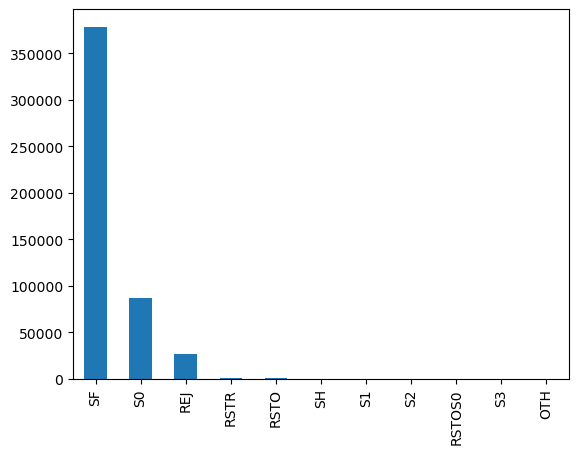

In [21]:
df['flag'].value_counts().plot(kind='bar')

In [22]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

0    420784
1     73237
Name: logged in, dtype: int64


C:\Users\kesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='logged in', ylabel='count'>

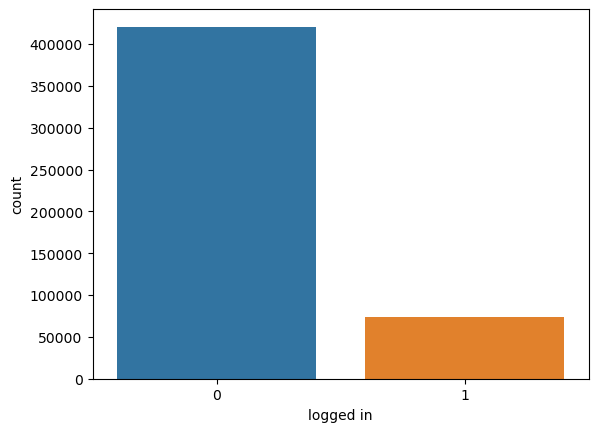

In [23]:
print(df['logged in'].value_counts())
sns.countplot(df['logged in'])

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64


C:\Users\kesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack Type', ylabel='count'>

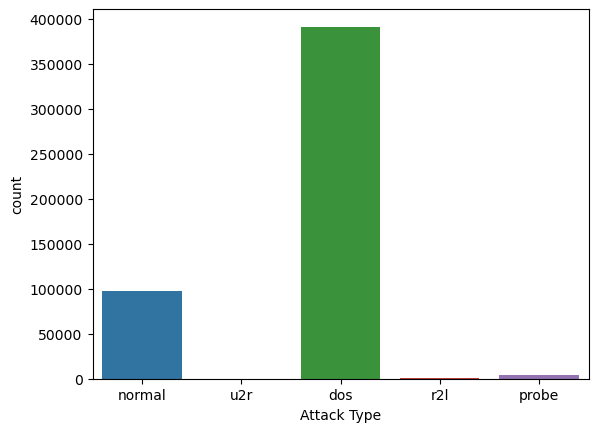

In [24]:
print(df['Attack Type'].value_counts())
sns.countplot(df['Attack Type'])

In [25]:
df.shape

(494021, 43)

C:\Users\kesha\AppData\Local\Temp\ipykernel_20912\4067945474.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df.dropna('columns')


(494021, 43)
(494021, 41)


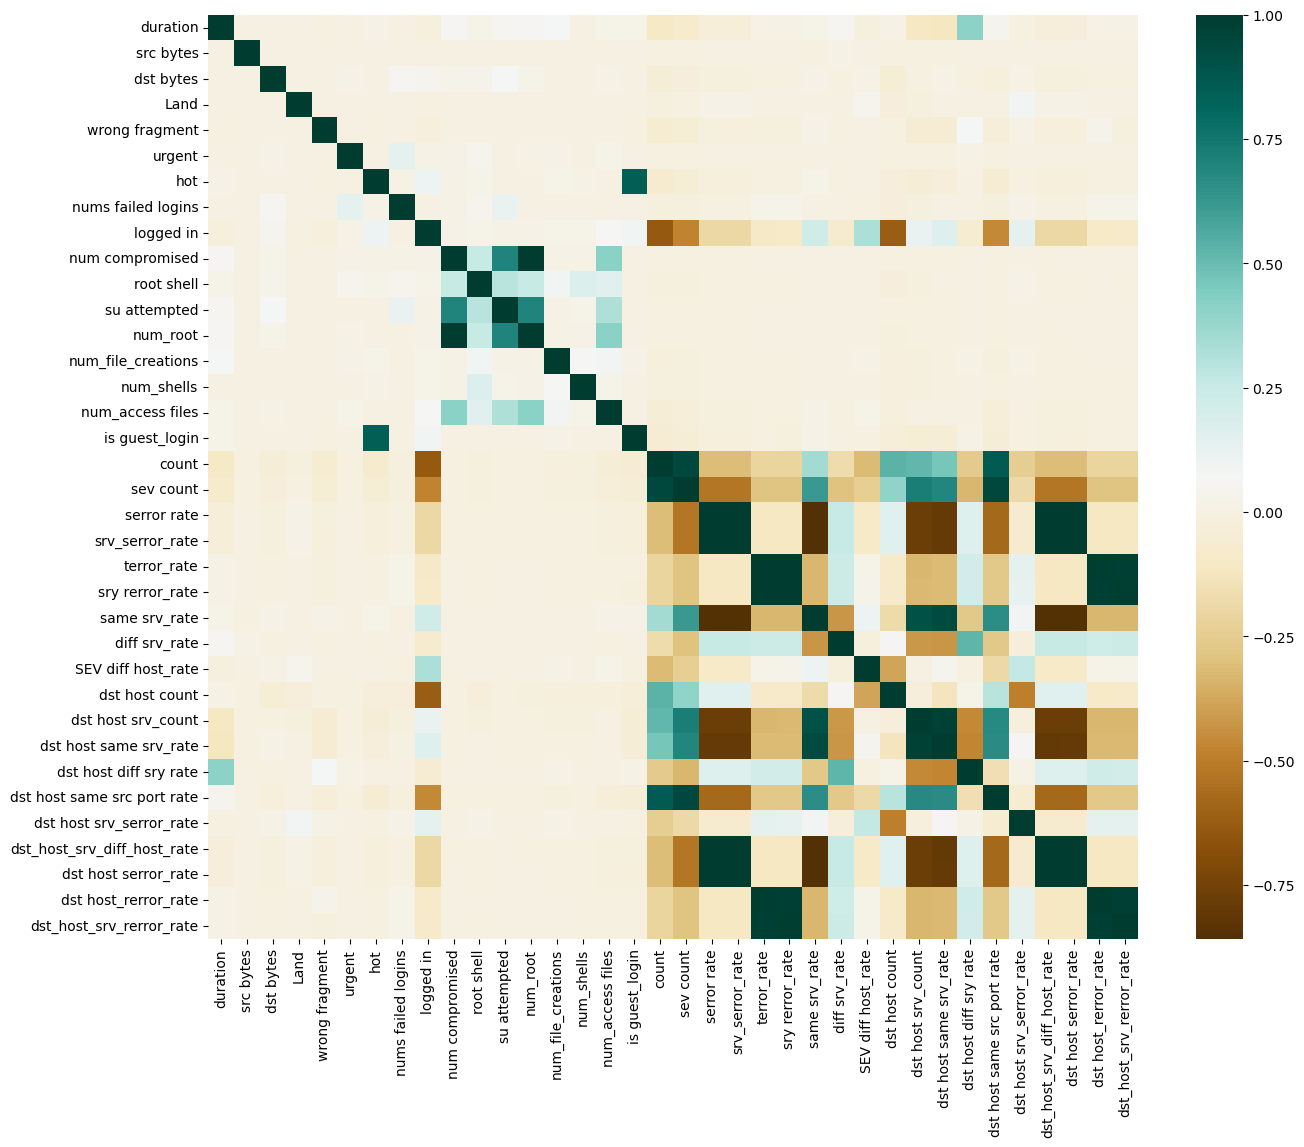

In [26]:
df.dropna('columns')
print(df.shape)
# drop columns with NON
df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values
print(df.shape)
corr=df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,cmap='BrBG')
plt.show()
#print(corr)
#print(df.describe())

In [27]:
df.head()

,duration,protocol type,service,flag,src bytes,dst bytes,Land,wrong fragment,urgent,hot,...,dst host same srv_rate,dst host diff sry rate,dst host same src port rate,dst host srv_serror_rate,dst_host_srv_diff_host_rate,dst host serror_rate,dst host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [28]:
df['num_root'].corr(df['num compromised'])

0.9938277978738366

In [29]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis= 1,inplace = True)

In [30]:
df['srv_serror_rate'].corr(df['dst host serror_rate'])

0.9993041091850098

In [31]:
df['srv_serror_rate'].corr(df['dst_host_srv_diff_host_rate'])

0.997835300373975

In [32]:
df['dst host serror_rate'].corr(df['dst_host_srv_diff_host_rate'])

0.9981559173373309

In [33]:
#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis=1,inplace=True)

In [34]:
df['sry rerror_rate'].corr(df['dst host_rerror_rate'])

0.9821663427308374

In [35]:
df['sry rerror_rate'].corr(df['dst_host_srv_rerror_rate'])

0.9865705438845669

In [36]:
#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation 0.9947309539817937)
df.drop('sry rerror_rate',axis=1, inplace=True)

In [37]:
#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst host srv_serror_rate', axis=1, inplace=True)

In [38]:
#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst host serror_rate',axis=1, inplace=True)

In [39]:
#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst host_rerror_rate',axis=1, inplace=True)

In [40]:
#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis=1, inplace=True)

In [41]:
#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865785438845669)
df.drop('dst host same srv_rate',axis = 1, inplace=True)

In [42]:
df.head()

,duration,protocol type,service,flag,src bytes,dst bytes,Land,wrong fragment,urgent,hot,...,same srv_rate,diff srv_rate,SEV diff host_rate,dst host count,dst host srv_count,dst host diff sry rate,dst host same src port rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [43]:
df.columns

Index(['duration', 'protocol type', 'service', 'flag', 'src bytes',
       'dst bytes', 'Land', 'wrong fragment', 'urgent', 'hot',
       'nums failed logins', 'logged in', 'num compromised', 'root shell',
       'su attempted', 'num_file_creations', 'num_shells', 'num_access files',
       'is guest_login', 'count', 'sev count', 'serror rate', 'terror_rate',
       'same srv_rate', 'diff srv_rate', 'SEV diff host_rate',
       'dst host count', 'dst host srv_count', 'dst host diff sry rate',
       'dst host same src port rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [44]:
df_std=df.std()
df_std=df_std.sort_values(ascending = True)
df_std

C:\Users\kesha\AppData\Local\Temp\ipykernel_20912\3128423343.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_std=df.std()


urgent                              0.005510
Land                                0.006673
su attempted                        0.007793
root shell                          0.010551
num_shells                          0.011020
nums failed logins                  0.015520
num_access files                    0.036482
is guest_login                      0.037211
diff srv_rate                       0.082205
num_file_creations                  0.096416
dst host diff sry rate              0.109259
wrong fragment                      0.134805
SEV diff host_rate                  0.142397
terror_rate                         0.231623
logged in                           0.355345
dst_host_srv_diff_host_rate         0.380593
serror rate                         0.380717
same srv_rate                       0.388189
dst host same src port rate         0.481309
hot                                 0.782103
num compromised                     1.798326
dst host count                     64.745380
dst host s

In [45]:
df['protocol type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol type, dtype: int64

In [46]:
#protocol_type feature mapping
pmap={'icmp':0, 'tcp':1, "udp":2}
df["protocol type"]=df["protocol type"].map(pmap)

In [47]:
df['protocol type'].value_counts()

0    283602
1    190065
2     20354
Name: protocol type, dtype: int64

In [48]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [49]:
#flag feature mapping
fmap = {'SF':0, 'S0':1, 'REJ' :2, 'RSTR':3, 'RSTO' :4, 'SH' :5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [50]:
df['flag'].value_counts()

0     378440
1      87007
2      26875
3        903
4        579
5        107
6         57
7         24
8         11
9         10
10         8
Name: flag, dtype: int64

In [51]:
df.head()

,duration,protocol type,service,flag,src bytes,dst bytes,Land,wrong fragment,urgent,hot,...,same srv_rate,diff srv_rate,SEV diff host_rate,dst host count,dst host srv_count,dst host diff sry rate,dst host same src port rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [52]:
df['service'].value_counts()

ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64

In [53]:
df.drop('service',axis = 1, inplace=True)#removing catagorical feature

In [54]:
df.dtypes

duration                         int64
protocol type                    int64
flag                             int64
src bytes                        int64
dst bytes                        int64
Land                             int64
wrong fragment                   int64
urgent                           int64
hot                              int64
nums failed logins               int64
logged in                        int64
num compromised                  int64
root shell                       int64
su attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access files                 int64
is guest_login                   int64
count                            int64
sev count                        int64
serror rate                    float64
terror_rate                    float64
same srv_rate                  float64
diff srv_rate                  float64
SEV diff host_rate             float64
dst host count           

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [62]:
df = df.drop( ["target",], axis=1)
print(df.shape)

#target partable and train set
Y = df[[ 'Attack Type']]
X = df.drop(['Attack Type',], axis=1)
sc = MinMaxScaler()
X = sc.fit_transform(X)
# split test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)


(494021, 31)
(395216, 30) (98805, 30)
(395216, 1) (98805, 1)


In [63]:
df1=df

df1

,duration,protocol type,flag,src bytes,dst bytes,Land,wrong fragment,urgent,hot,nums failed logins,...,terror_rate,same srv_rate,diff srv_rate,SEV diff host_rate,dst host count,dst host srv_count,dst host diff sry rate,dst host same src port rate,dst_host_srv_diff_host_rate,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,0.0,1.0,0.0,0.00,9,9,0.0,0.11,0.00,normal
1,0,1,0,239,486,0,0,0,0,0,...,0.0,1.0,0.0,0.00,19,19,0.0,0.05,0.00,normal
2,0,1,0,235,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.00,29,29,0.0,0.03,0.00,normal
3,0,1,0,219,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.00,39,39,0.0,0.03,0.00,normal
4,0,1,0,217,2032,0,0,0,0,0,...,0.0,1.0,0.0,0.00,49,49,0.0,0.02,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,0,310,1881,0,0,0,0,0,...,0.0,1.0,0.0,0.40,86,255,0.0,0.01,0.00,normal
494017,0,1,0,282,2286,0,0,0,0,0,...,0.0,1.0,0.0,0.00,6,255,0.0,0.17,0.00,normal
494018,0,1,0,203,1200,0,0,0,0,0,...,0.0,1.0,0.0,0.17,16,255,0.0,0.06,0.06,normal
494019,0,1,0,291,1200,0,0,0,0,0,...,0.0,1.0,0.0,0.17,26,255,0.0,0.04,0.04,normal


In [64]:
df=df1

In [65]:
print(X_test)

[[0.   0.   0.   ... 0.   1.   0.  ]
 [0.   0.   0.   ... 0.   1.   0.  ]
 [0.   1.   0.   ... 0.86 1.   0.  ]
 ...
 [0.   0.   0.   ... 0.   1.   0.  ]
 [0.   0.5  0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   1.   0.  ]]


In [66]:
#X_test=X_test[:4940]
#Y_test=Y_test[:4940]
#print(X_train.shape, X_test.shape)
#print(Y_train.shape, Y_test.shape)

# Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
import time

In [68]:
model1=GaussianNB()

In [69]:
start_time = time.time()
model1.fit(X_train, Y_train)
end_time = time.time()

C:\Users\kesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
print("Training Time = ", round(end_time-start_time,2),"s")

Training Time =  0.94 s


In [71]:
start_time = time.time()
Y_test_pred=model1.predict(X_test)
end_time = time.time()

In [72]:
print("Testing Time = ", round(end_time-start_time,2),"s")

Testing Time =  0.7 s


In [73]:
accuracy = accuracy_score(Y_test, Y_test_pred)
print("Accuracy:", round(accuracy*100,2),"%")

Accuracy: 88.89 %


# Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model2=LogisticRegression(max_iter=1200)

In [76]:
start_time = time.time()
model2.fit(X_train, Y_train)
end_time = time.time()

C:\Users\kesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
print("Training Time = ", round(end_time-start_time,2),"s")

Training Time =  88.32 s


In [78]:
start_time = time.time()
Y_test_pred2=model2.predict(X_test)
end_time = time.time()

In [79]:
print("Testing Time = ", round(end_time-start_time,4),"s")

Testing Time =  0.0215 s


In [80]:
accuracy = accuracy_score(Y_test, Y_test_pred2)
print("Accuracy:", round(accuracy*100,2),"%")

Accuracy: 99.39 %


# Random Forest Regression

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
model3 = RandomForestClassifier(n_estimators=50)

In [83]:
start_time = time.time()
model3.fit(X_train, Y_train)
end_time = time.time()

C:\Users\kesha\AppData\Local\Temp\ipykernel_20912\4160586133.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train, Y_train)


In [84]:
print("Training Time = ", round(end_time-start_time,2),"s")

Training Time =  18.8 s


In [85]:
start_time = time.time()
Y_test_pred3=model3.predict(X_test)
end_time = time.time()

In [86]:
print("Testing Time = ", round(end_time-start_time,2),"s")

Testing Time =  0.46 s


In [87]:
accuracy = accuracy_score(Y_test, Y_test_pred3)
print("Accuracy:", round(accuracy*100,2),"%")

Accuracy: 99.97 %


# Support Vector Machine

In [88]:
from sklearn.svm import SVC

In [89]:
model4=SVC(kernel='rbf')

In [90]:
start_time = time.time()
model4.fit(X_train, Y_train)
end_time = time.time()

C:\Users\kesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
print("Training Time = ", round(end_time-start_time,2),"s")

Training Time =  36737.16 s


In [92]:
start_time = time.time()
Y_test_pred4=model4.predict(X_test)
end_time = time.time()

In [93]:
print("Testing Time = ", round(end_time-start_time,2),"s")

Testing Time =  69.27 s


In [94]:
accuracy = accuracy_score(Y_test, Y_test_pred4)
print("Accuracy:", round(accuracy*100,2),"%")

Accuracy: 99.82 %


# Comparison

In [95]:
import matplotlib.pyplot as plt

### Accuracy Score

Text(0.5, 1.0, 'Accuracy Score of models')

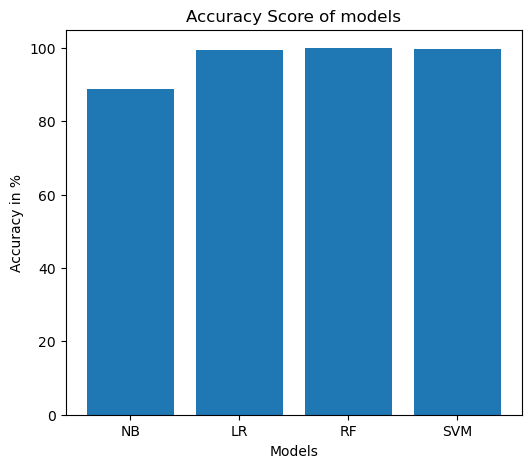

In [96]:
names = ['NB', 'LR', "RF", "SVM"]
values = [88.71, 99.41, 99.97, 99.82]
f = plt.figure(figsize =(20,5), num =100)
plt.subplot(131)

plt.bar(names, values)

plt.xlabel("Models")

plt.ylabel( "Accuracy in %")

plt.title("Accuracy Score of models")

### Training Time

Text(0.5, 1.0, 'Training Time of models')

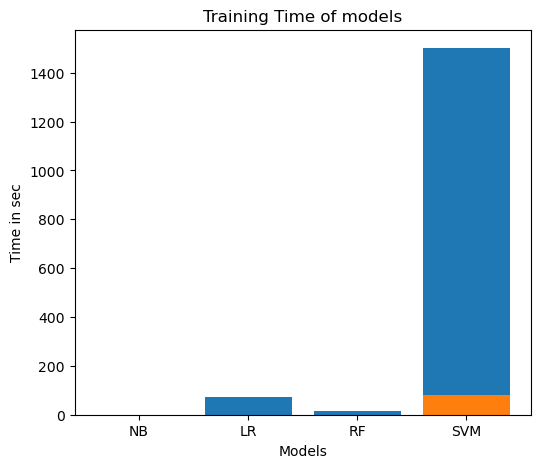

In [97]:
names = ['NB', 'LR', "RF", "SVM"]
values1 = [0.62, 70.51, 16.99, 1501.16]
values2 = [0.19, 0.0464, 0.5, 79.84]
f = plt.figure(figsize =(20,5), num =10)
plt.subplot(131)

plt.bar(names, values1, label=names)
plt.bar(names, values2, label=names)

plt.xlabel("Models")
plt.ylabel( "Time in sec")

plt.title("Training Time of models")

### Test Time

Text(0.5, 1.0, 'Test Time of models')

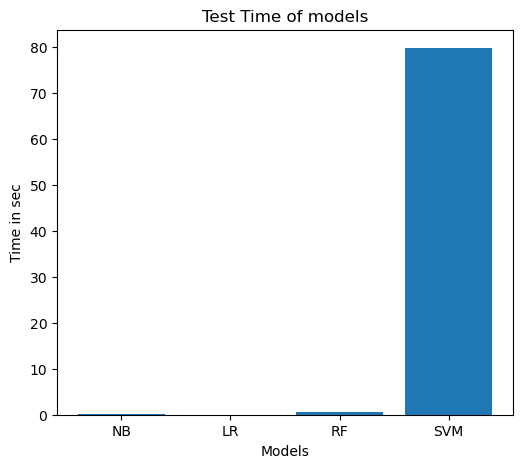

In [98]:
names = ['NB', 'LR', "RF", "SVM"]
values = [0.19, 0.0464, 0.5, 79.84]
f = plt.figure(figsize =(20,5), num =10)
plt.subplot(131)

plt.bar(names, values)

plt.xlabel("Models")

plt.ylabel( "Time in sec")

plt.title("Test Time of models")

In [100]:
git --init

NameError: name 'git' is not defined